In [1]:
### import modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import adjusted_rand_score, accuracy_score
from graspologic.utils import remap_labels
from utils import calculate_dissim, calculate_dissim_unmatched, cluster_dissim, construct_df, plot_clustering, laplacian_dissim
import random
from myst_nb import glue

# Unmatched Networks
We will run the same clustering algorithms (Agglomerative clustering, GMM, and KMeans) on the dissimilarity matrices generated from each kernel. Similarly, we compare the ARI values for each clustering algorithm for each kernel.

Note that by default, we only show the result for Agglomerative clustering on the dissimilarity matrix constructed by the Edge weight kernel, but all results can be expanded for viewing.

## Load Data

In [2]:
# HIDE CELL
from pathlib import Path

graphs_all = np.zeros((225, 200, 200))
species_list = []

npy_files = Path('../mami_data/conn').glob('*')
for i, file in enumerate(npy_files):
    graphs_all[i] = np.load(file)
    filestr = str(file).split('/')[-1]
    filestr = filestr.split('.')[0]
    species_list.append(filestr)

random.seed(3)

# construct labels based on taxonomy orders
info_df = pd.read_csv('../mami_data/info.csv')
filenames = info_df.pop("Filename").to_list()
orders_all = info_df.pop("Order").to_list()

order_mapper = {}
for i, filename in enumerate(filenames):
    if orders_all[i] == 'Artiodactyla':
        orders_all[i] = 'Cetartiodactyla'
    order_mapper[filename] = orders_all[i]

labels_all = list(map(order_mapper.get, species_list))

# get subset of labels, graphs
orders = ['Chiroptera', 'Primates']
#orders = ['Chiroptera', 'Rodentia', 'Cetartiodactyla', 'Carnivora', 'Perissodactyla', 'Primates']
ind_ch = []
ind_pr = []
labels = []

for i, label in enumerate(labels_all):
    if label == 'Chiroptera':
        #labels.append(label)
        ind_ch.append(i)
    elif label == 'Primates':
        #labels.append(label)
        ind_pr.append(i)

ind_ch_samp = random.sample(ind_ch, len(ind_ch)//2)
ind_pr_samp = random.sample(ind_pr, len(ind_pr)//2)

ind = ind_ch_samp + ind_pr_samp
ind.sort()
graphs = graphs_all[ind]
labels = list(np.array(labels_all)[ind])

mapper = {}

for i, label in enumerate(set(labels)):
    mapper[label] = i
y = list(map(mapper.get, labels))

print(len(labels))

38


## Agglomerative Clustering

Here we use agglomerative clustering to cluster the graphs directly on the dissimilarity matrix, and the calculated linkage matrix and clusters are visualized with a heatmap below.

For each kernel, we report the accuracy score, the number of correct predictions divided by the total number of samples, and the adjusted rand index.

### Density

Accuracy: 0.8157894736842105
ARI: 0.37900307341596956


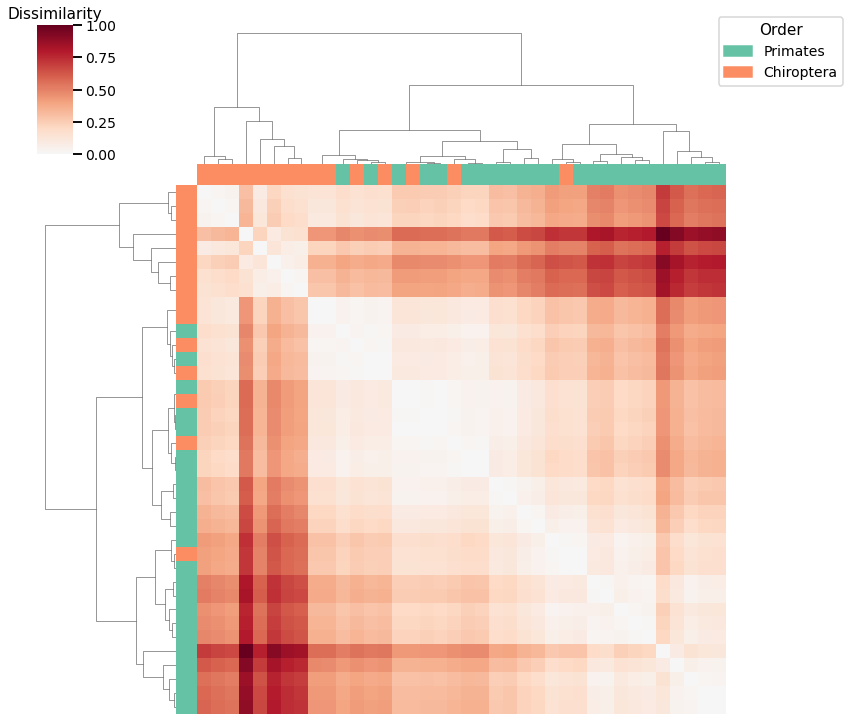

In [4]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_density_dissim = calculate_dissim(graphs, method="density", norm=None, normalize=True)

# cluster dissimilarity matrix
density_linkage_matrix, density_pred = cluster_dissim(scaled_density_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
density_pred = remap_labels(y, density_pred)
density_agg_score = accuracy_score(y, density_pred)
density_agg_ari = adjusted_rand_score(y, density_pred)

print(f"Accuracy: {density_agg_score}")
print(f"ARI: {density_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_density_dissim, density_linkage_matrix)

### Average Edge Weight

Accuracy: 0.6052631578947368
ARI: 0.003844400359796444


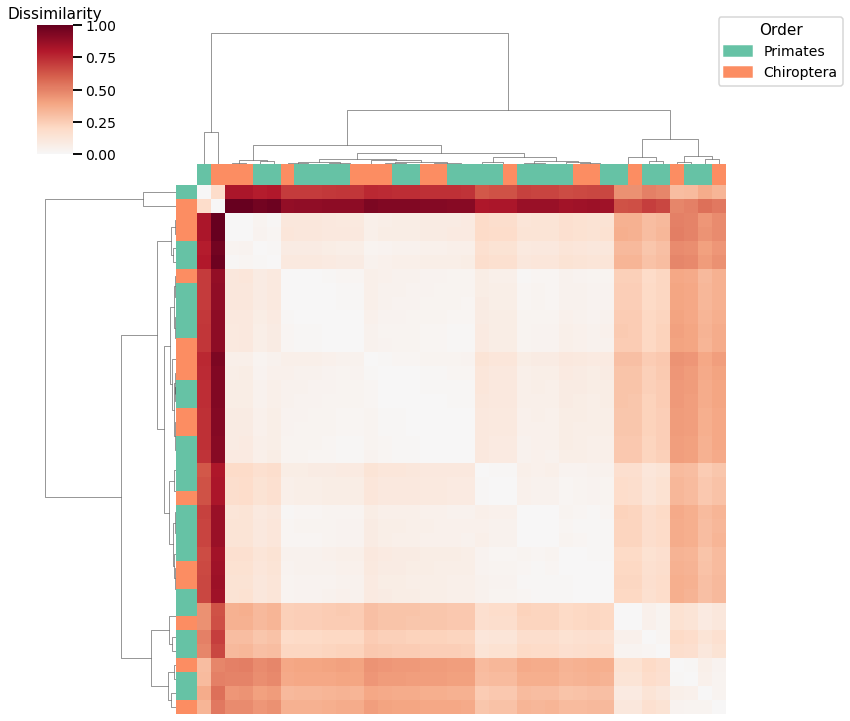

In [5]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_avgedgeweight_dissim = calculate_dissim(graphs, method="avgedgeweight", norm=None, normalize=True)

# cluster dissimilarity matrix
avgedgeweight_linkage_matrix, avgedgeweight_pred = cluster_dissim(scaled_avgedgeweight_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
avgedgeweight_pred = remap_labels(y, avgedgeweight_pred)
avgedgeweight_agg_score = accuracy_score(y, avgedgeweight_pred)
avgedgeweight_agg_ari = adjusted_rand_score(y, avgedgeweight_pred)

print(f"Accuracy: {avgedgeweight_agg_score}")
print(f"ARI: {avgedgeweight_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_avgedgeweight_dissim, avgedgeweight_linkage_matrix)

### Average of Adjacency Matrix

Accuracy: 0.8157894736842105
ARI: 0.37900307341596956


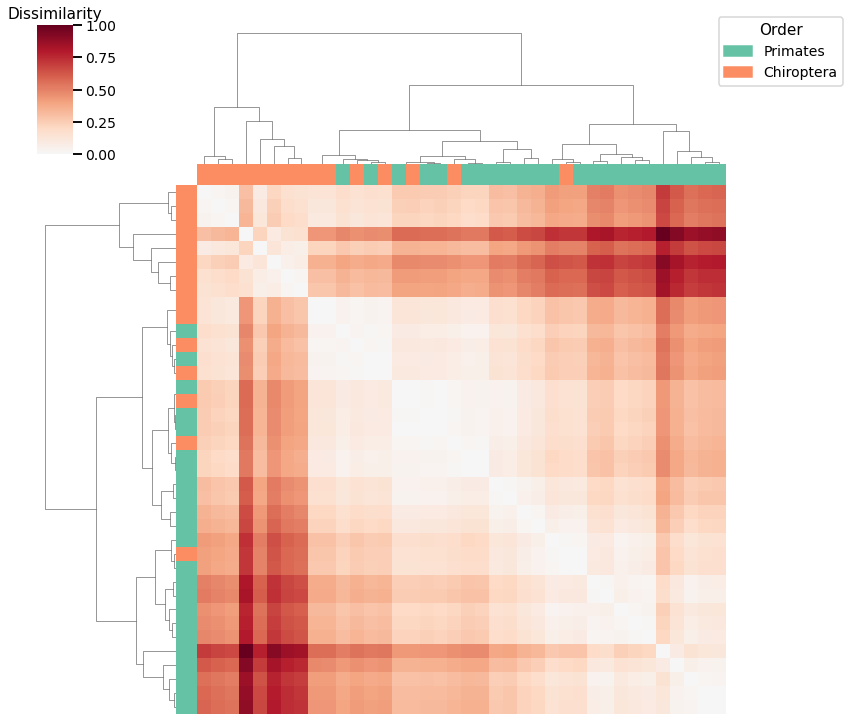

In [6]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_avgadjmat_dissim = calculate_dissim(graphs, method="avgadjmatrix", norm=None, normalize=True)

# cluster dissimilarity matrix
avgadjmat_linkage_matrix, avgadjmat_pred = cluster_dissim(scaled_avgadjmat_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
avgadjmat_pred = remap_labels(y, avgadjmat_pred)
avgadjmat_agg_score = accuracy_score(y, avgadjmat_pred)
avgadjmat_agg_ari = adjusted_rand_score(y, avgadjmat_pred)

print(f"Accuracy: {avgadjmat_agg_score}")
print(f"ARI: {avgadjmat_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_avgadjmat_dissim, avgadjmat_linkage_matrix)

### Laplacian Spectral Distance

Accuracy: 0.7631578947368421
ARI: 0.25118454399647394


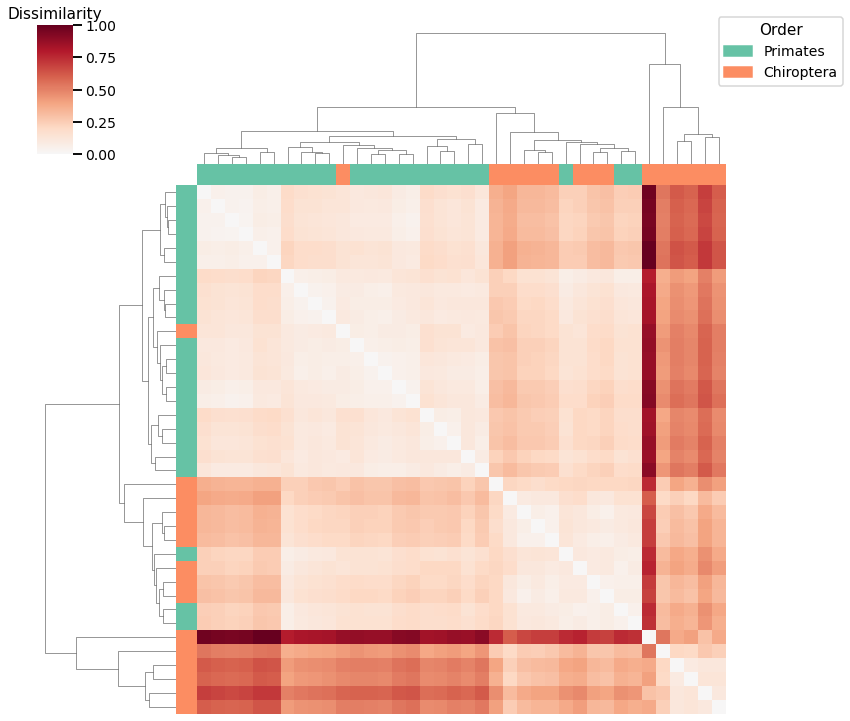

In [7]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_lap_dissim = laplacian_dissim(graphs, transform='pass-to-ranks', metric='l2', normalize=True)

# cluster dissimilarity matrix
lap_linkage_matrix, lap_pred = cluster_dissim(scaled_lap_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
lap_pred = remap_labels(y, lap_pred)
lap_agg_score = accuracy_score(y, lap_pred)
lap_agg_ari = adjusted_rand_score(y, lap_pred)

print(f"Accuracy: {lap_agg_score}")
print(f"ARI: {lap_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_lap_dissim, lap_linkage_matrix)

### Node Degree

Accuracy: 0.7105263157894737
ARI: 0.14536047449274056


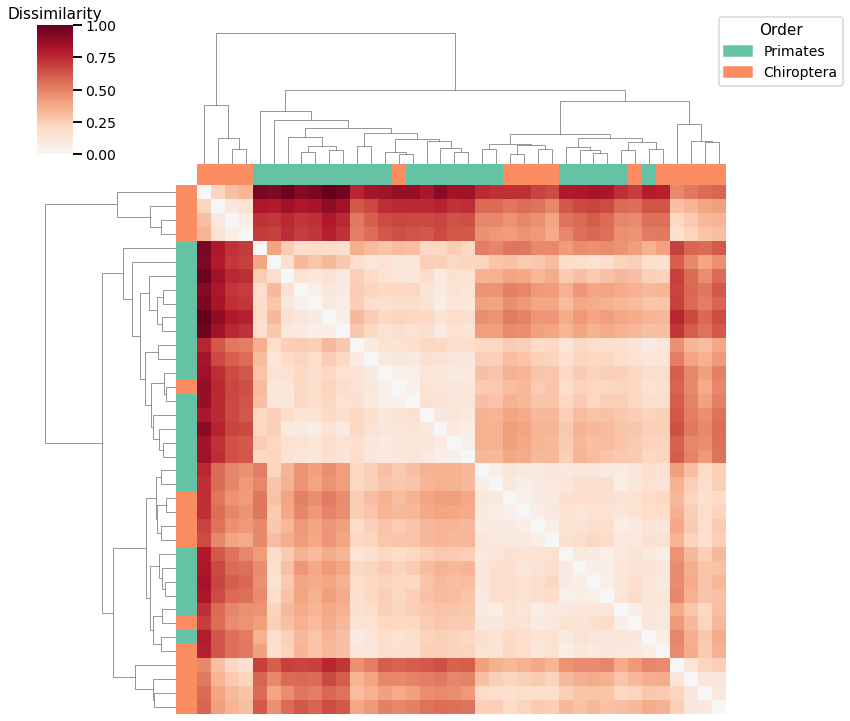

In [8]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_nodedeg_dissim = calculate_dissim_unmatched(graphs, method="degree", normalize=True)

# cluster dissimilarity matrix
nodedeg_linkage_matrix, nodedeg_pred = cluster_dissim(scaled_nodedeg_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
nodedeg_pred = remap_labels(y, nodedeg_pred)
nodedeg_agg_score = accuracy_score(y, nodedeg_pred)
nodedeg_agg_ari = adjusted_rand_score(y, nodedeg_pred)

print(f"Accuracy: {nodedeg_agg_score}")
print(f"ARI: {nodedeg_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_nodedeg_dissim, nodedeg_linkage_matrix)

### Node Strength

Accuracy: 0.8157894736842105
ARI: 0.37900307341596956


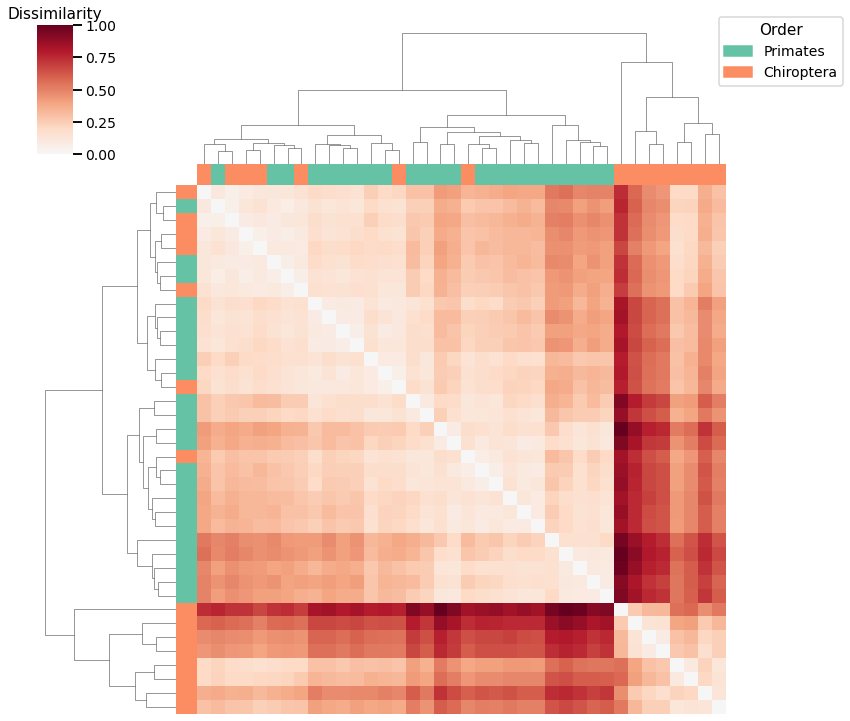

In [9]:
# HIDE CELL
# calculate dissimilarity matrix
scaled_nodestr_dissim = calculate_dissim_unmatched(graphs, method="strength", normalize=True)

# cluster dissimilarity matrix
nodestr_linkage_matrix, nodestr_pred = cluster_dissim(scaled_nodestr_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
nodestr_pred = remap_labels(y, nodestr_pred)
nodestr_agg_score = accuracy_score(y, nodestr_pred)
nodestr_agg_ari = adjusted_rand_score(y, nodestr_pred)

print(f"Accuracy: {nodestr_agg_score}")
print(f"ARI: {nodestr_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_nodestr_dissim, nodestr_linkage_matrix)

### Edge Weight

Accuracy: 0.6842105263157895
ARI: 0.10071340713407134


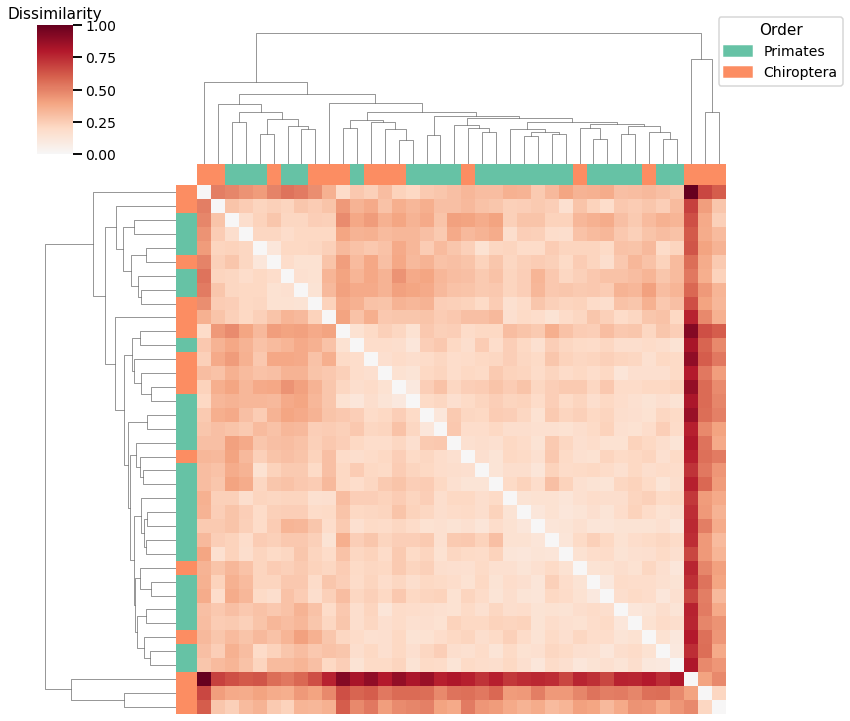

In [10]:
# HIDE CODE
# calculate dissimilarity matrix
scaled_edgeweight_dissim = calculate_dissim_unmatched(graphs, method="edgeweight", normalize=True)

# cluster dissimilarity matrix
edgeweight_linkage_matrix, edgeweight_pred = cluster_dissim(scaled_edgeweight_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
edgeweight_pred = remap_labels(y, edgeweight_pred)
edgeweight_agg_score = accuracy_score(y, edgeweight_pred)
edgeweight_agg_ari = adjusted_rand_score(y, edgeweight_pred)

print(f"Accuracy: {edgeweight_agg_score}")
print(f"ARI: {edgeweight_agg_ari}")

# plot clustered dissimilarity matrix
plot_clustering(labels, 'agg', scaled_edgeweight_dissim, edgeweight_linkage_matrix)

### Latent Distribution Test

Accuracy: 0.7368421052631579
ARI: 0.19552068007193069


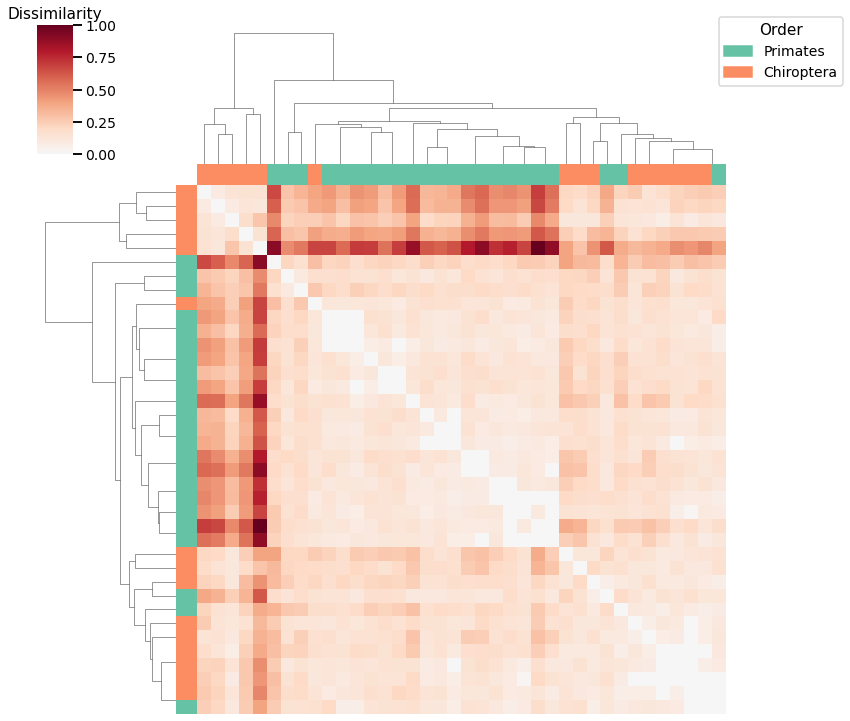

In [36]:
# HIDE CELL
from graspologic.inference import latent_distribution_test
from graspologic.align import SeedlessProcrustes
from graspologic.plot import heatmap
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.utils import largest_connected_component
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

ase_graphs = []
for i, graph in enumerate(graphs):
    lcc_graph = largest_connected_component(graph)
    ase_graph = AdjacencySpectralEmbed(n_components=4).fit_transform(lcc_graph)
    ase_graphs.append(ase_graph)

# calculate alignments
latent_dissim = np.zeros((len(ase_graphs), len(ase_graphs)))
for j in tqdm(range(0, len(ase_graphs) - 1)):
    for i in range(j+1, len(ase_graphs)):
        aligner = SeedlessProcrustes()
        graph1 = aligner.fit_transform(ase_graphs[i], ase_graphs[j])
        statistic, _, _ = latent_distribution_test(graph1, ase_graphs[j], test='mgc', metric='euclidean', \
            n_bootstraps=0, align_type=None, input_graph=False)
        latent_dissim[i, j] = statistic

scaled_latent_dissim = latent_dissim / np.max(latent_dissim)
scaled_latent_dissim = scaled_latent_dissim + scaled_latent_dissim.T

# cluster dissimilarity matrix
scaled_latent_dissim[scaled_latent_dissim < 0] = 0
latent_linkage_matrix, latent_pred = cluster_dissim(scaled_latent_dissim, y, method="agg", n_components=2)

# calculate accuracy and ARI
latent_pred = remap_labels(y, latent_pred)
latent_agg_score = accuracy_score(y, latent_pred)
latent_agg_ari = adjusted_rand_score(y, latent_pred)

print(f"Accuracy: {latent_agg_score}")
print(f"ARI: {latent_agg_ari}")

# plot clustered dissimilarity matrix
mami_latent_agg_fig = plot_clustering(labels, 'agg', scaled_latent_dissim, latent_linkage_matrix)

#glue("mami_latent_agg", mami_latent_agg_fig, display=False)

## GMM

We use [classical multidimensional scaling](https://microsoft.github.io/graspologic/latest/reference/reference/embed.html#graspologic.embed.ClassicalMDS) to embed the dissimilarity matrices into a 2-dimensional space, then we use GMM to cluster these points. We assign the number of components to be 4 since there are 4 genotypes, and the clusters are visualized with a scattermap below. The colors indicate the true genotypes, and the shapes (O or X) indicate whether or not the predictions are correct. 

For each kernel, we report the accuracy score, the number of correct predictions divided by the total number of samples, and the adjusted rand index.

### Density

Accuracy: 0.7368421052631579
ARI: 0.19552068007193069


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

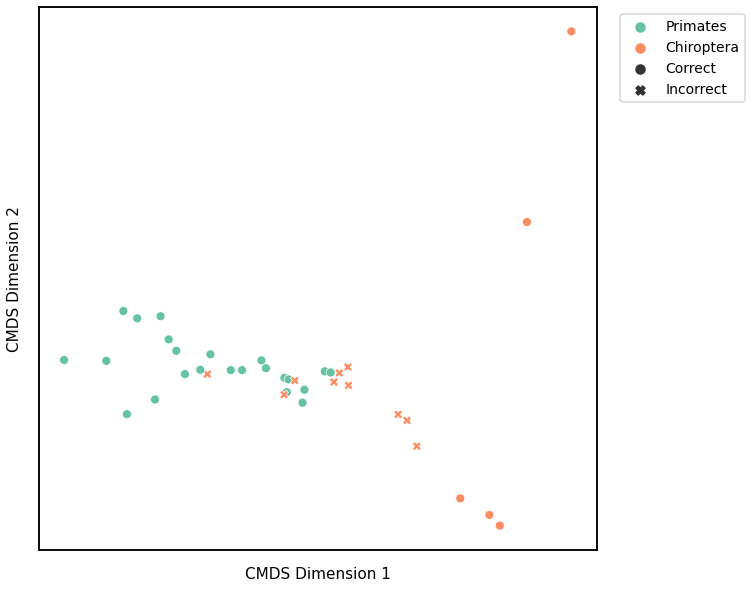

In [11]:
# HIDE CELL
# cluster dissimilarity matrix
density_gm_embedding, density_gm_pred = cluster_dissim(scaled_density_dissim, y, method='gmm', n_components=2)
density_gm, density_gm_pred = construct_df(density_gm_embedding, labels, y, density_gm_pred)

# calculate accuracy and ARI
density_gm_score = accuracy_score(y, density_gm_pred)
density_gm_ari = adjusted_rand_score(y, density_gm_pred)

print(f"Accuracy: {density_gm_score}")
print(f"ARI: {density_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=density_gm)

### Average Edge Weight

Accuracy: 0.5526315789473685
ARI: -0.01948207575911445


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

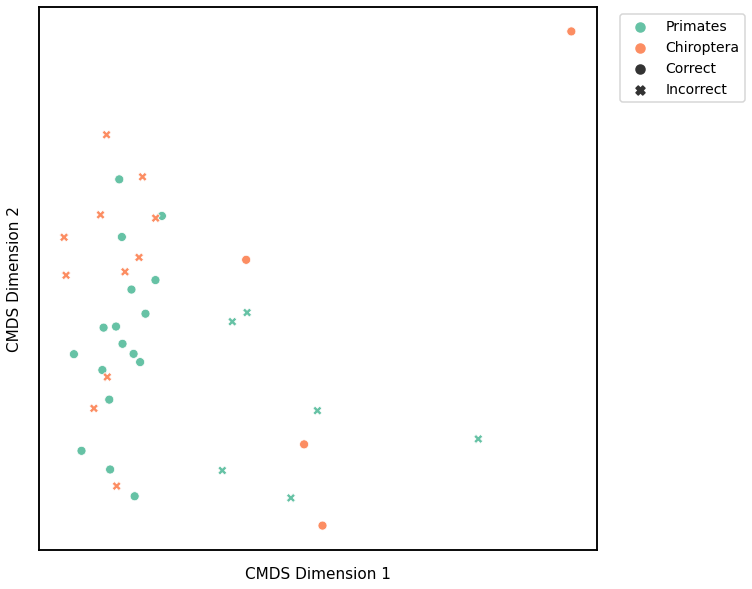

In [12]:
# HIDE CELL
# cluster dissimilarity matrix
avgedgeweight_gm_embedding, avgedgeweight_gm_pred = cluster_dissim(scaled_avgedgeweight_dissim, y, method='gmm', n_components=2)
avgedgeweight_gm, avgedgeweight_gm_pred = construct_df(avgedgeweight_gm_embedding, labels, y, avgedgeweight_gm_pred)

# calculate accuracy and ARI
avgedgeweight_gm_score = accuracy_score(y, avgedgeweight_gm_pred)
avgedgeweight_gm_ari = adjusted_rand_score(y, avgedgeweight_gm_pred)

print(f"Accuracy: {avgedgeweight_gm_score}")
print(f"ARI: {avgedgeweight_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=avgedgeweight_gm)

### Average of the Adjacency Matrix

Accuracy: 0.7368421052631579
ARI: 0.19552068007193069


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

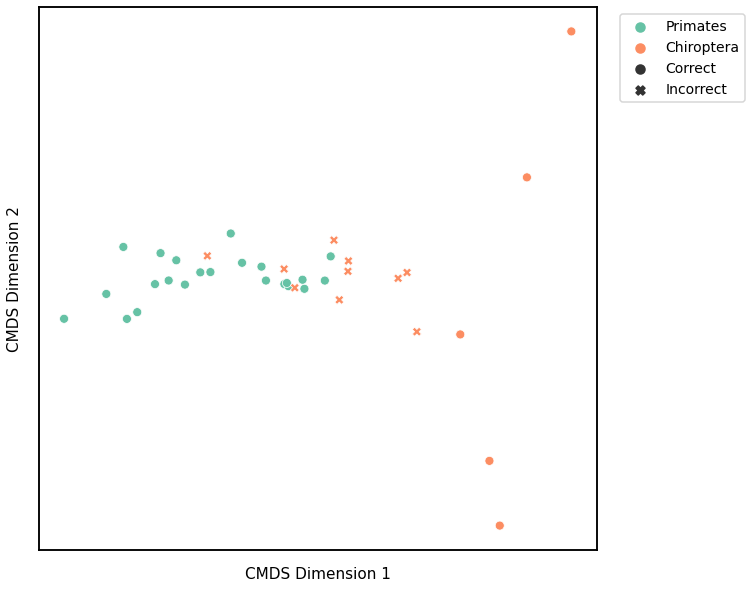

In [13]:
# HIDE CELL
# cluster dissimilarity matrix
avgadjmat_gm_embedding, avgadjmat_gm_pred = cluster_dissim(scaled_avgadjmat_dissim, y, method="gmm", n_components=2)
avgadjmat_gm, avgadjmat_gm_pred = construct_df(avgadjmat_gm_embedding, labels, y, avgadjmat_gm_pred)

# calculate accuracy and ARI
avgadjmat_gm_score = accuracy_score(y, avgadjmat_gm_pred)
avgadjmat_gm_ari = adjusted_rand_score(y, avgadjmat_gm_pred)

print(f"Accuracy: {avgadjmat_gm_score}")
print(f"ARI: {avgadjmat_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=avgadjmat_gm)

### Laplacian Spectral Distance

Accuracy: 0.7894736842105263
ARI: 0.31234614193253885


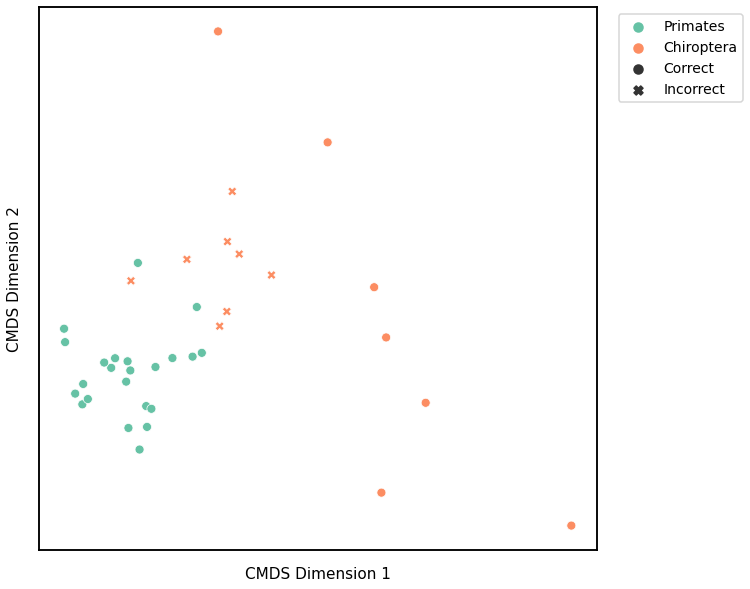

In [19]:
# HIDE CELL
# cluster dissimilarity matrix
lap_gm_embedding, lap_gm_pred = cluster_dissim(scaled_lap_dissim, y, method="gmm", n_components=2)
lap_gm, lap_gm_pred = construct_df(lap_gm_embedding, labels, y, lap_gm_pred)

# calculate accuracy and ARI
lap_gm_score = accuracy_score(y, lap_gm_pred)
lap_gm_ari = adjusted_rand_score(y, lap_gm_pred)

print(f"Accuracy: {lap_gm_score}")
print(f"ARI: {lap_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=lap_gm)
fig.legend(bbox_to_anchor=(1.275, 1))

### Node Degree

Accuracy: 0.8157894736842105
ARI: 0.37900307341596956


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

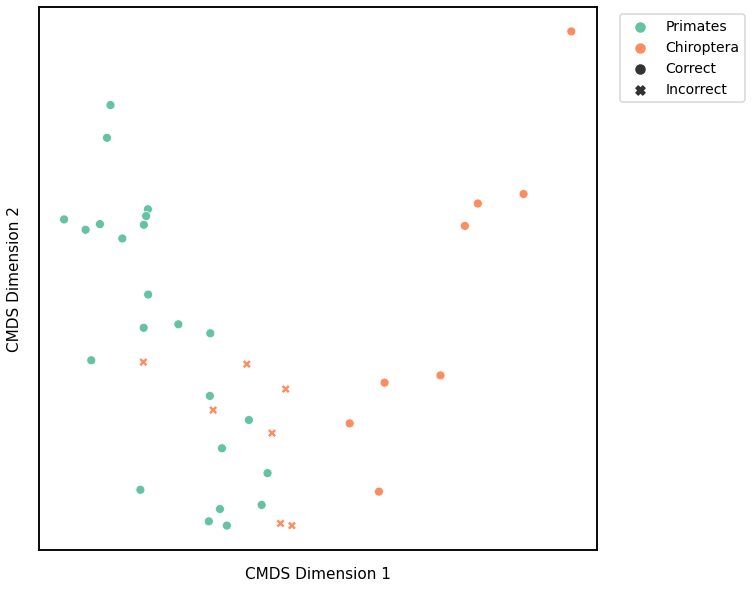

In [20]:
# HIDE CELL
# cluster dissimilarity matrix
nodedeg_gm_embedding, nodedeg_gm_pred = cluster_dissim(scaled_nodedeg_dissim, y, method="gmm", n_components=2)
nodedeg_gm, nodedeg_gm_pred = construct_df(nodedeg_gm_embedding, labels, y, nodedeg_gm_pred)

# calculate accuracy and ARI
nodedeg_gm_score = accuracy_score(y, nodedeg_gm_pred)
nodedeg_gm_ari = adjusted_rand_score(y, nodedeg_gm_pred)

print(f"Accuracy: {nodedeg_gm_score}")
print(f"ARI: {nodedeg_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=nodedeg_gm)

### Node Strength

Accuracy: 0.8157894736842105
ARI: 0.37900307341596956


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

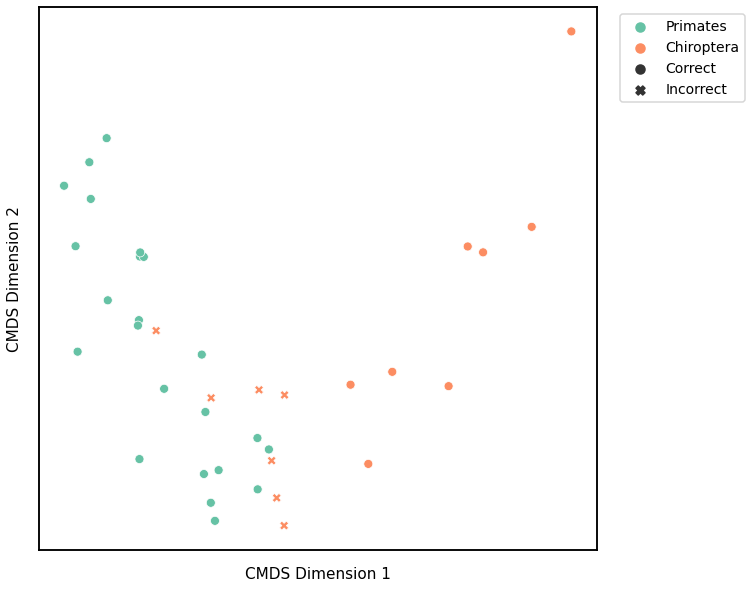

In [21]:
# HIDE CELL
# cluster dissimilarity matrix
nodestr_gm_embedding, nodestr_gm_pred = cluster_dissim(scaled_nodestr_dissim, y, method="gmm", n_components=2)
nodestr_gm, nodestr_gm_pred = construct_df(nodestr_gm_embedding, labels, y, nodestr_gm_pred)

# calculate accuracy and ARI
nodestr_gm_score = accuracy_score(y, nodestr_gm_pred)
nodestr_gm_ari = adjusted_rand_score(y, nodestr_gm_pred)

print(f"Accuracy: {nodestr_gm_score}")
print(f"ARI: {nodestr_gm_ari}")

# plot clustering
plot_clustering(labels, 'gmm', data=nodestr_gm)

### Edge Weight

Accuracy: 0.6578947368421053
ARI: 0.0647883980139417


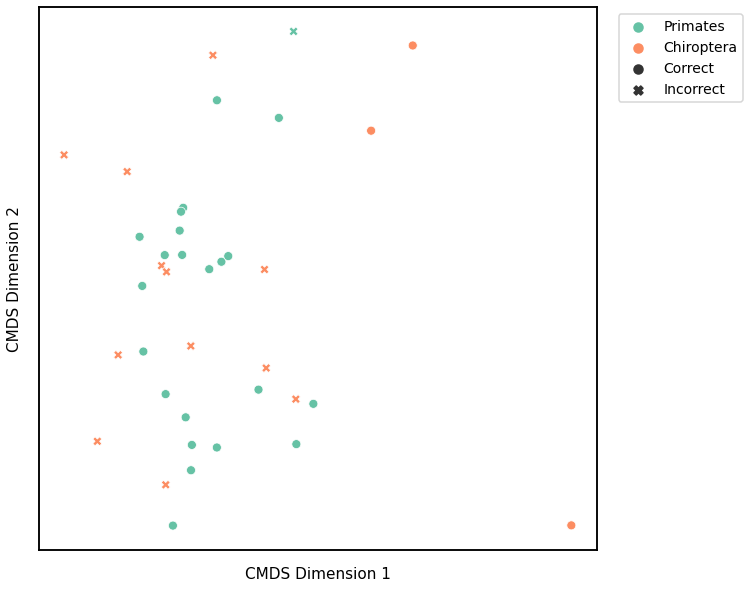

In [23]:
# HIDE CELL
# cluster dissimilarity matrix
edgeweight_gm_embedding, edgeweight_gm_pred = cluster_dissim(scaled_edgeweight_dissim, y, method="gmm", n_components=2)
edgeweight_gm, edgeweight_gm_pred = construct_df(edgeweight_gm_embedding, labels, y, edgeweight_gm_pred)

# calculate accuracy and ARI
edgeweight_gm_score = accuracy_score(y, edgeweight_gm_pred)
edgeweight_gm_ari = adjusted_rand_score(y, edgeweight_gm_pred)

print(f"Accuracy: {edgeweight_gm_score}")
print(f"ARI: {edgeweight_gm_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=edgeweight_gm)
fig.legend(bbox_to_anchor=(1.275, 1))

### Latent Distribution Test

Accuracy: 0.8157894736842105
ARI: 0.38031481669544026


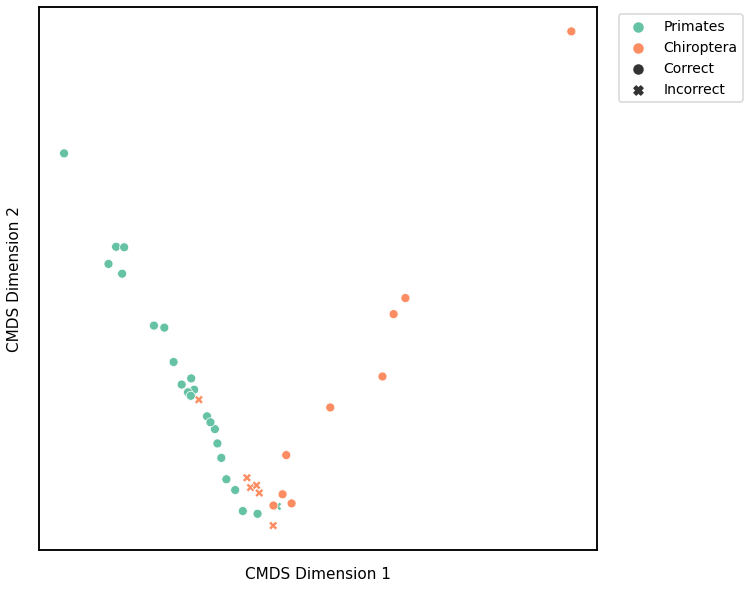

In [37]:
# HIDE CELL
# cluster dissimilarity matrix
scaled_latent_dissim[scaled_latent_dissim < 0] = 0
latent_gm_embedding, latent_gm_pred = cluster_dissim(scaled_latent_dissim, y, method="gmm", n_components=2)
latent_gm, latent_gm_pred = construct_df(latent_gm_embedding, labels, y, latent_gm_pred)

# calculate accuracy and ARI
latent_gm_score = accuracy_score(y, latent_gm_pred)
latent_gm_ari = adjusted_rand_score(y, latent_gm_pred)

print(f"Accuracy: {latent_gm_score}")
print(f"ARI: {latent_gm_ari}")

# plot clustering
mami_latent_gmm_fig = plot_clustering(labels, 'gmm', data=latent_gm)
mami_latent_gmm_fig.legend(bbox_to_anchor=(1.275, 1))

glue('mami_latent_gmm', mami_latent_gmm_fig, display=False)

## K-Means

Similar to GMM, we first use [classical multidimensional scaling](https://microsoft.github.io/graspologic/latest/reference/reference/embed.html#graspologic.embed.ClassicalMDS) to embed the dissimilarity matrices into a 2-dimensional space, then use KMeans to predict the genotypes of each point. The clusters are shown in the scatterplot below, and the colors represent the true genotypes and the shapes (O or X) indicate whether or not we made correct predictions.

For each kernel, we report the raw accuracy score, the number of correct predictions divided by the total number of samples, and the adjusted rand index.

### Density

Accuracy: 0.868421052631579
ARI: 0.5302001190751023


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

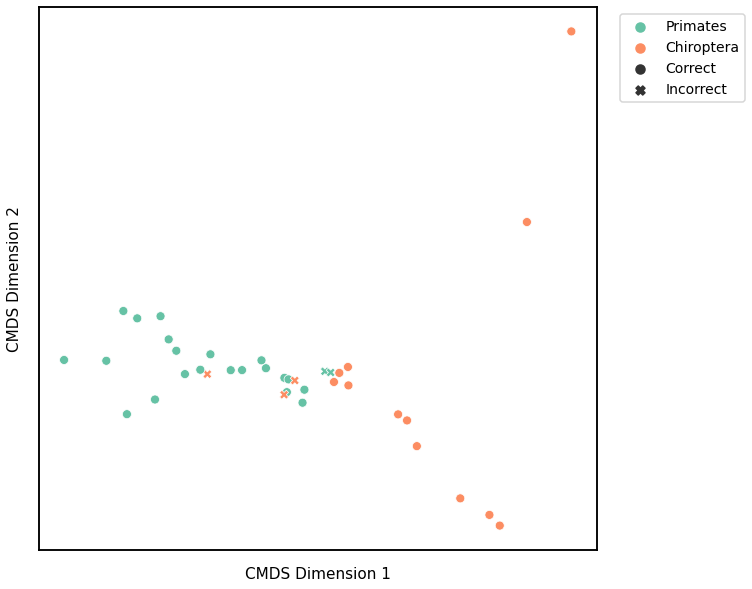

In [24]:
# HIDE CELL
# cluster dissimilarity matrix
density_km_embedding, density_km_pred = cluster_dissim(scaled_density_dissim, y, method="kmeans", n_components=2)
density_km, density_km_pred = construct_df(density_km_embedding, labels, y, density_km_pred)

# calculate accuracy and ARI
density_km_score = accuracy_score(y, density_km_pred)
density_km_ari = adjusted_rand_score(y, density_km_pred)

print(f"Accuracy: {density_km_score}")
print(f"ARI: {density_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=density_km)

### Average Edge Weight

Accuracy: 0.5789473684210527
ARI: -0.006213200611561108


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

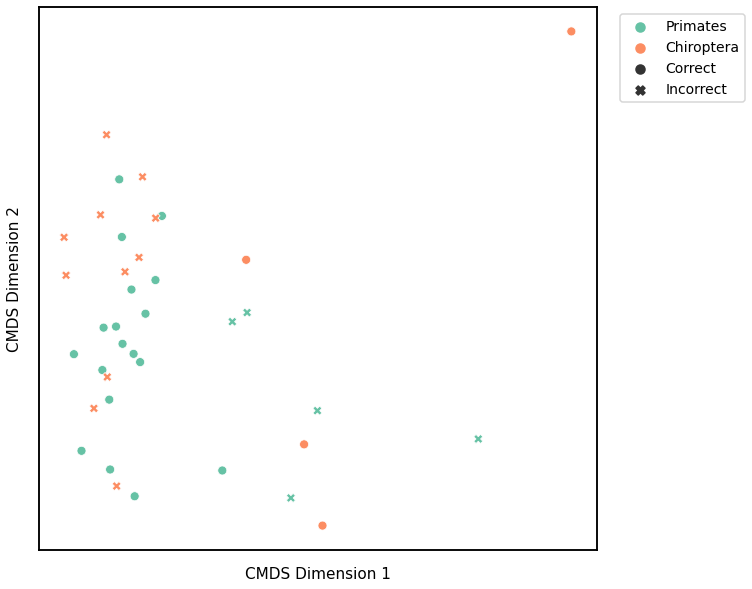

In [25]:
# HIDE CELL
# cluster dissimilarity matrix
avgedgeweight_km_embedding, avgedgeweight_km_pred = cluster_dissim(scaled_avgedgeweight_dissim, y, method='kmeans', n_components=2)
avgedgeweight_km, avgedgeweight_km_pred = construct_df(avgedgeweight_km_embedding, labels, y, avgedgeweight_km_pred)

# calculate accuracy and ARI
avgedgeweight_km_score = accuracy_score(y, avgedgeweight_km_pred)
avgedgeweight_km_ari = adjusted_rand_score(y, avgedgeweight_km_pred)

print(f"Accuracy: {avgedgeweight_km_score}")
print(f"ARI: {avgedgeweight_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=avgedgeweight_km)

### Average of the Adjacency Matrix

Accuracy: 0.868421052631579
ARI: 0.5302001190751023


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

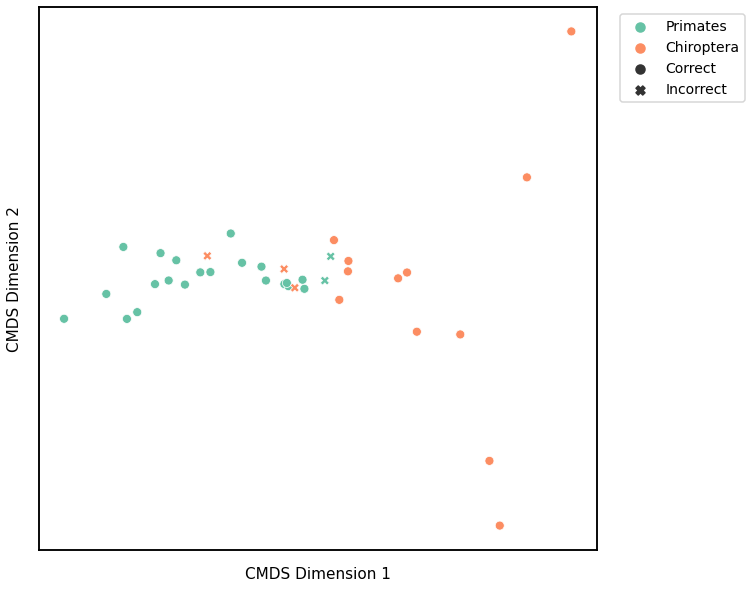

In [26]:
# HIDE CELL
# cluster dissimilarity matrix
avgadjmat_km_embedding, avgadjmat_km_pred = cluster_dissim(scaled_avgadjmat_dissim, y, method='kmeans', n_components=2)
avgadjmat_km, avgadjmat_km_pred = construct_df(avgadjmat_km_embedding, labels, y, avgadjmat_km_pred)

# calculate accuracy and ARI
avgadjmat_km_score = accuracy_score(y, avgadjmat_km_pred)
avgadjmat_km_ari = adjusted_rand_score(y, avgadjmat_km_pred)

print(f"Accuracy: {avgadjmat_km_score}")
print(f"ARI: {avgadjmat_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=avgadjmat_km)

### Laplacian Spectral Distance

Accuracy: 0.7894736842105263
ARI: 0.31234614193253885


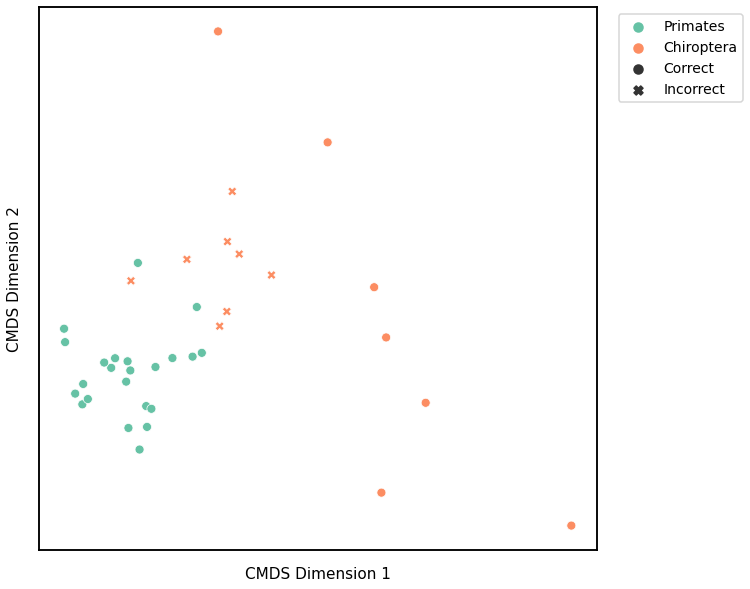

In [28]:
# HIDE CELL
# cluster dissimilarity matrix
lap_km_embedding, lap_km_pred = cluster_dissim(scaled_lap_dissim, y, method="gmm", n_components=2)
lap_km, lap_km_pred = construct_df(lap_km_embedding, labels, y, lap_km_pred)

# calculate accuracy and ARI
lap_km_score = accuracy_score(y, lap_km_pred)
lap_km_ari = adjusted_rand_score(y, lap_km_pred)

print(f"Accuracy: {lap_km_score}")
print(f"ARI: {lap_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'gmm', data=lap_km)
fig.legend(bbox_to_anchor=(1.275, 1))

### Node Degree

Accuracy: 0.8157894736842105
ARI: 0.37900307341596956


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

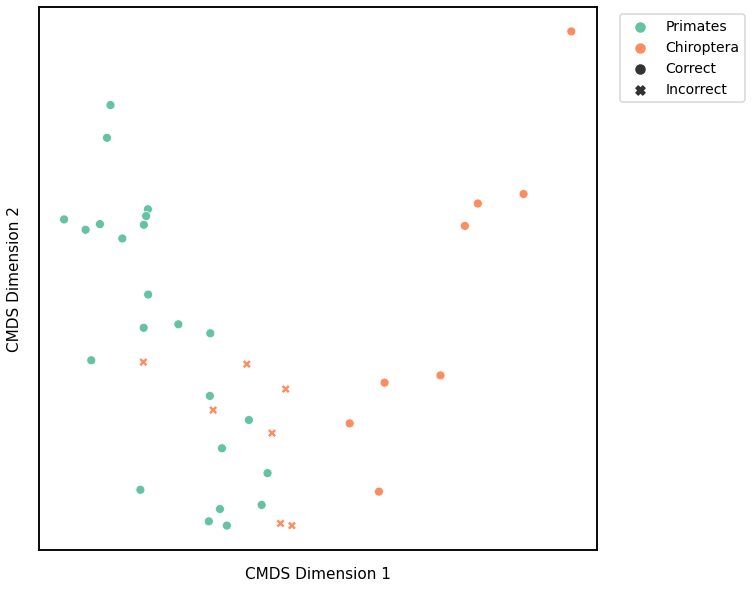

In [29]:
# HIDE CELL
# cluster dissimilarity matrix
nodedeg_km_embedding, nodedeg_km_pred = cluster_dissim(scaled_nodedeg_dissim, y, method='kmeans', n_components=2)
nodedeg_km, nodedeg_km_pred = construct_df(nodedeg_km_embedding, labels, y, nodedeg_km_pred)

# calculate accuracy and ARI
nodedeg_km_score = accuracy_score(y, nodedeg_km_pred)
nodedeg_km_ari = adjusted_rand_score(y, nodedeg_km_pred)

print(f"Accuracy: {nodedeg_km_score}")
print(f"ARI: {nodedeg_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=nodedeg_km)

### Node Strength

Accuracy: 0.8157894736842105
ARI: 0.37900307341596956


<AxesSubplot:xlabel='CMDS Dimension 1', ylabel='CMDS Dimension 2'>

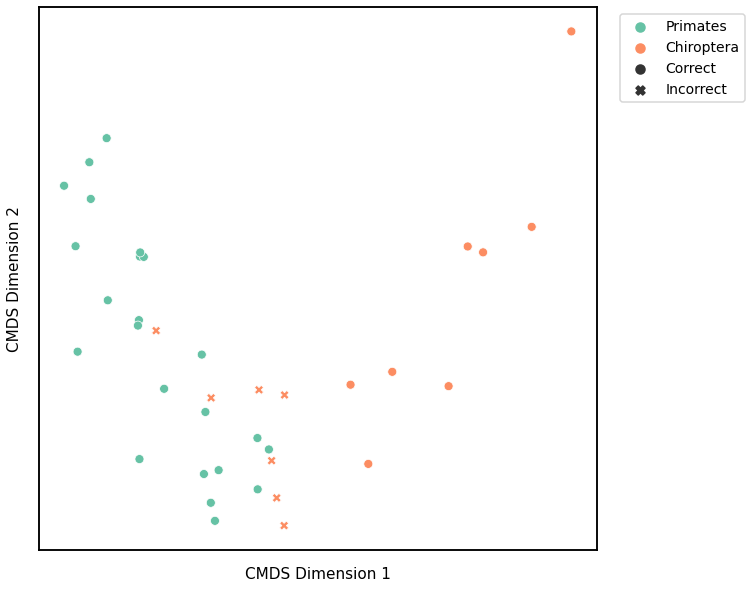

In [30]:
# HIDE CELL
# cluster dissimilarity matrix
nodestr_km_embedding, nodestr_km_pred = cluster_dissim(scaled_nodestr_dissim, y, method='kmeans', n_components=2)
nodestr_km, nodestr_km_pred = construct_df(nodestr_km_embedding, labels, y, nodestr_km_pred)

# calculate accuracy and ARI
nodestr_km_score = accuracy_score(y, nodestr_km_pred)
nodestr_km_ari = adjusted_rand_score(y, nodestr_km_pred)

print(f"Accuracy: {nodestr_km_score}")
print(f"ARI: {nodestr_km_ari}")

# plot clustering
plot_clustering(labels, 'kmeans', data=nodestr_km)

### Edge Weight

Accuracy: 0.631578947368421
ARI: 0.04134807383236741


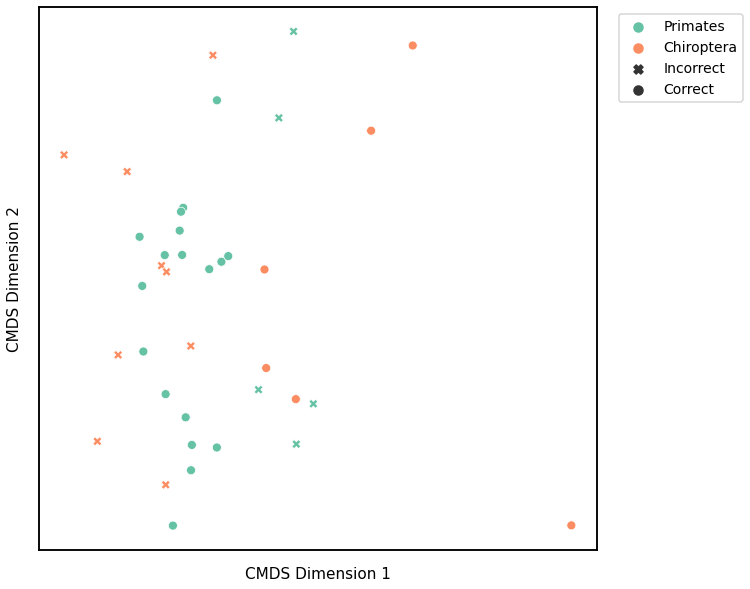

In [31]:
# HIDE CELL
# cluster dissimilarity matrix
edgeweight_km_embedding, edgeweight_km_pred = cluster_dissim(scaled_edgeweight_dissim, y, method='kmeans', n_components=2)
edgeweight_km, edgeweight_km_pred = construct_df(edgeweight_km_embedding, labels, y, edgeweight_km_pred)

# calculate accuracy and ARI
edgeweight_km_score = accuracy_score(y, edgeweight_km_pred)
edgeweight_km_ari = adjusted_rand_score(y, edgeweight_km_pred)

print(f"Accuracy: {edgeweight_km_score}")
print(f"ARI: {edgeweight_km_ari}")

# plot clustering
fig = plot_clustering(labels, 'kmeans', data=edgeweight_km)
fig.legend(bbox_to_anchor=(1.275, 1))

### Latent Distribution Test

Accuracy: 0.7368421052631579
ARI: 0.19552068007193069


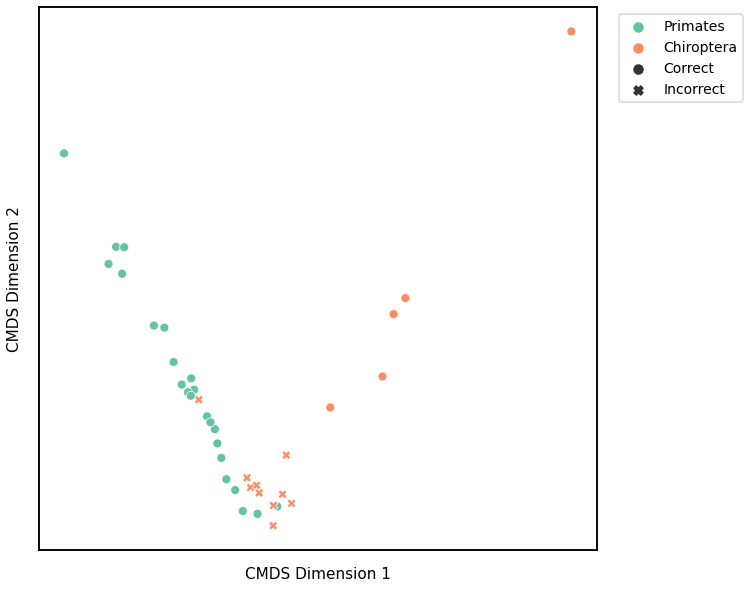

In [38]:
# HIDE CELL
# cluster dissimilarity matrix
scaled_latent_dissim[scaled_latent_dissim < 0] = 0
latent_km_embedding, latent_km_pred = cluster_dissim(scaled_latent_dissim, y, method='kmeans', n_components=2)
latent_km, latent_km_pred = construct_df(latent_km_embedding, labels, y, latent_km_pred)

# calculate accuracy and ARI
latent_km_score = accuracy_score(y, latent_km_pred)
latent_km_ari = adjusted_rand_score(y, latent_km_pred)

print(f"Accuracy: {latent_km_score}")
print(f"ARI: {latent_km_ari}")

# plot clustering
mami_latent_km_fig = plot_clustering(labels, 'kmeans', data=latent_km)
mami_latent_km_fig.legend(bbox_to_anchor=(1.275, 1))

glue('mami_latent_km', mami_latent_km_fig, display=False)

# ARI Plot

We use the adjusted rand index (ARI) to compare the performace of each clustering algorithm on each kernel. The ARI values are visualized with a scatter plot below, and the colors represent the different clustering algorithms. The kernels are sorted by the average ARI value of the three clustering algorithms, from highest to lowest. We also compute the ARI values for each clustering algorithm for a random matrix, which is indicated by the red dash line and should be close to 0. 

In [34]:
# HIDE CODE
from graspologic.utils import symmetrize

# construct symmetric random matrix with zero diagonal
np.random.seed(3)
scaled_random = np.random.rand(len(graphs), len(graphs))
scaled_random = symmetrize(scaled_random)

# agglomerative clustering
random_linkage_matrix, random_pred = cluster_dissim(scaled_random, y, method="agg", n_components=2)
random_pred = remap_labels(y, random_pred)
random_agg_score = accuracy_score(y, random_pred)
random_agg_ari = adjusted_rand_score(y, random_pred)

# GMM
random_gm_embedding, random_gm_pred = cluster_dissim(scaled_random, y, method="gmm", n_components=2)
random_gm, random_gm_pred = construct_df(random_gm_embedding, labels, y, random_gm_pred)
random_gm_score = accuracy_score(y, random_gm_pred)
random_gm_ari = adjusted_rand_score(y, random_gm_pred)

# K-Means
random_km_embedding, random_km_pred = cluster_dissim(scaled_random, y, method="kmeans", n_components=2)
random_km, random_km_pred = construct_df(random_km_embedding, labels, y, random_km_pred)
random_km_score = accuracy_score(y, random_km_pred)
random_km_ari = adjusted_rand_score(y, random_km_pred)

random_avg_ari_val = (random_agg_ari + random_gm_ari + random_km_ari) / 3

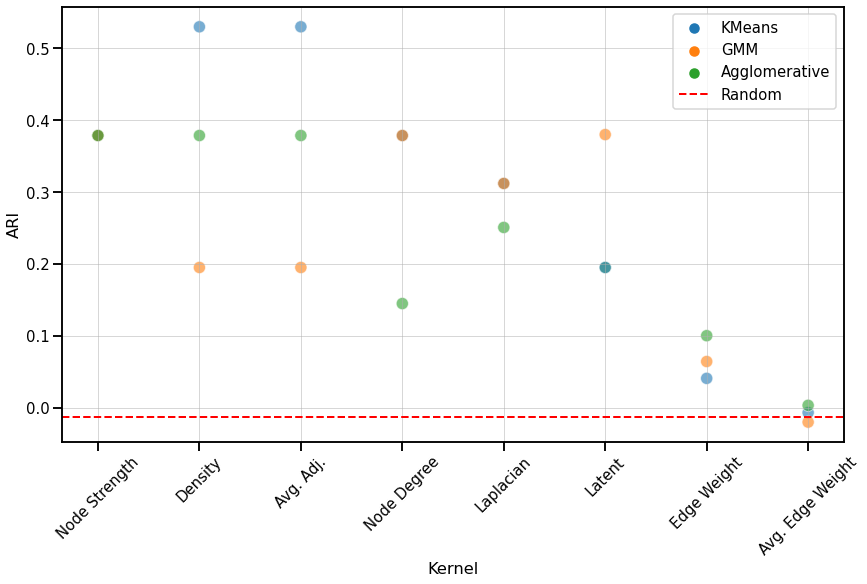

In [40]:
# HIDE CODE
kernels = ['Density', 'Avg. Edge Weight', 'Avg. Adj.', 'Laplacian', 'Node Degree', 'Node Strength', \
    'Edge Weight', 'Latent']
kernels_df = [kernel for kernel in kernels for i in range(3)]
agg_ari = [density_agg_ari, avgedgeweight_agg_ari, avgadjmat_agg_ari, lap_agg_ari, nodedeg_agg_ari, \
    nodestr_agg_ari, edgeweight_agg_ari, latent_agg_ari]
gm_ari = [density_gm_ari, avgedgeweight_gm_ari, avgadjmat_gm_ari, lap_gm_ari, nodedeg_gm_ari, \
    nodestr_gm_ari, edgeweight_gm_ari, latent_gm_ari]
km_ari = [density_km_ari, avgedgeweight_km_ari, avgadjmat_km_ari, lap_km_ari, nodedeg_km_ari, \
    nodestr_km_ari, edgeweight_km_ari, latent_km_ari]

ari_vals = np.vstack((np.array(agg_ari), np.array(gm_ari), np.array(km_ari)))
ari_vals = np.ravel(ari_vals.T)
algos = ['Agglomerative', 'GMM', 'KMeans'] * len(agg_ari)

ari_df = pd.DataFrame(list(zip(kernels_df, ari_vals, algos)), columns=["Kernel", "ARI", "Algorithm"])

avg_ari_vals = (np.array(agg_ari) + np.array(gm_ari) + np.array(km_ari)) / 3
avg_ari_vals = [val for val in avg_ari_vals for i in range(3)]
ari_df["Average"] = avg_ari_vals
ari_df = ari_df.sort_values(by=['Average'], ascending=False)

mami_cluster_fig, ax = plt.subplots(1,1, figsize=(14, 8), facecolor='w')
sns.set_context("talk", font_scale=0.9)
sns.scatterplot(x="Kernel", y="ARI", hue="Algorithm", data=ari_df, alpha=0.6, s=150)
plt.axhline(y=random_avg_ari_val, color='r', linestyle='--', linewidth=2, label='Random')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linewidth=0.5)

glue("mami_cluster", mami_cluster_fig, display=False)

```{glue:figure} mami_cluster_fig
:name: "mami-cluster"

Scatter plot comparing the ARI values of each clustering algorithm for every kernel, from highest to lowest based on the average ARI value. Most kernels perform better than chance.
```

We observe similar trends to those of the discriminability plot for unmatched networks, where kernels that use global properties of the network perform better than node-wise or edge-wise kernels, with the exception of the Node strength kernel. There is no one clustering algorithm that performs consistently well, suggesting that the dissimilarity matrix is the main determining factor in its clustering performance rather than the algorithm itself. 